In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_data(filename):
  return np.loadtxt(filename)

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\g'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_3215/2454713069.py:34: SyntaxWarning: invalid escape sequence '\l'
  ax[0].set_ylabel(f"$\log({data_type}Prof)$")
/tmp/ipykernel_3215/2454713069.py:35: SyntaxWarning: invalid escape sequence '\g'
  ax[1].set_ylabel(f"$\gamma_p$")


m=-1.8836005649018217, c=3.8347831157691394
m=-1.0514623635200648, c=4.304008573289931
m=-0.7953429091941657, c=4.653454422709834
m=-0.6799552126299203, c=4.908491758231353
m=-0.6185934979940089, c=5.1043119439782405
m=-0.5824269497900276, c=5.259094579275854
m=-0.5593306182925544, c=5.3836434609551365
m=-0.5435639845461617, c=5.4853148945026335


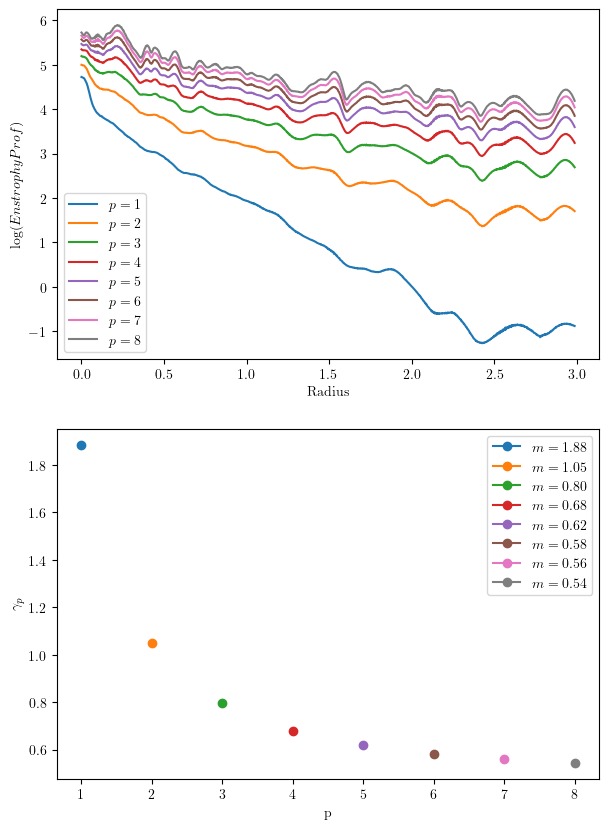

In [6]:
domain_size = 2048
xmin = 50
data_type = "Enstrophy"
# data_type = "Energy"

#######################333
data = read_data("embarrassed_2DNS/02-kdn16/test6/" + data_type + ".179.txt")
data = data[xmin:]
data_log = np.log(data)

gamma_p = np.zeros(8)
# line fit for each column of data

# make two plots
fig, ax = plt.subplots(2,1, figsize=(7, 10))

for p in range(8):
  x = np.arange(len(data_log[:, p])) * 2 * np.pi / domain_size
  y = data_log[:, p]
  A = np.vstack([x, np.ones(len(x))]).T
  m, c = np.linalg.lstsq(A, y, rcond=None)[0]
  gamma_p[p] = -m
  print(f"m={m}, c={c}")
  ax[0].plot(x, y, label=f"$p={p + 1}$")
  ax[1].plot(p + 1, gamma_p[p], marker='o', label=f"$m = {-m:.2f}$")
  # ax[0].plot(x, m * x + c, label=f"$p={p + 1}$ fit ($m={-m:.2f}$)")

# plot gamma_p
ax[0].legend()
ax[1].legend()
# add x and y labels
ax[0].set_xlabel("Radius")
ax[1].set_xlabel("p")
ax[0].set_ylabel(f"$\log({data_type}Prof)$")
ax[1].set_ylabel(f"$\gamma_p$")

plt.show()

In [29]:
data_log[:,1].size

924

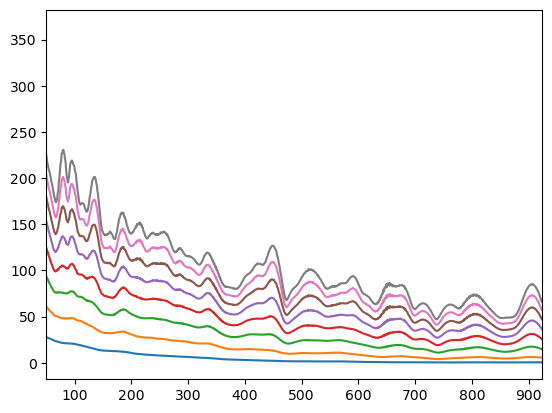

In [23]:
fig, ax = plt.subplots()
ax.plot(data)
#ax.loglog()
ax.set_xlim(xmin, len(data))
plt.show()

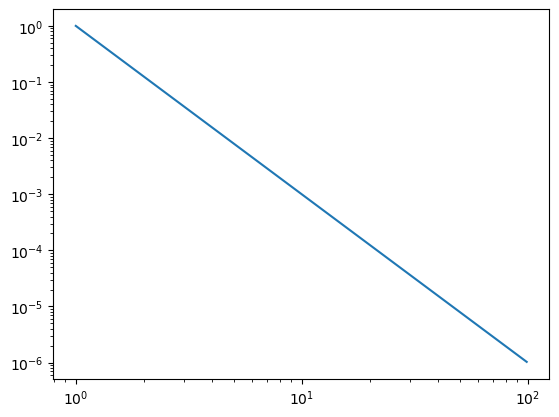

In [35]:
# sample log plot 1/r^p as loglog plot
r = np.arange(1, 100)
p = 3
plt.plot(r, 1/r**p)
plt.xscale("log")
plt.yscale("log")
plt.show()
